In [1]:
pip install rdkit

     ---------------------------------------- 20.7/20.7 MB 5.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit import DataStructs
# import multifunctional libraries
import os
import numpy as np
import pandas as pd
import string
import pickle

In [2]:
os.getcwd()

'c:\\Users\\gabi1\\git\\ACTC_MD_ML\\gaby_notebooks'

In [3]:
os.chdir('..\\data\\generated')
os.getcwd()

'c:\\Users\\gabi1\\git\\ACTC_MD_ML\\data\\generated'

In [4]:
data = pd.read_csv('1-0-hgk-MD-ActCoeff-processed_Activity.csv', encoding='latin1')
#data = pd.DataFrame(data)
data.head()

,#,Name of the polymer,CounterIon,Co-Ion,salt,Water-per-ion,concentration of salt (M),gr_minima (Ion_H2O),gr_peak_position (Ion_H2O),gr_peak_height (Ion_H2O),Nr_(Ion_H2O),gr_minima (CG_H2O),gr_peak_position (CG_H2O),gr_peak_hight (CG_H2O),Nr_(CG_H2O),gr_minima (CG_Ion),gr_peak_position (CG_Ion),gr_peak_height (CG_Ion),Nr_(CG_Ion),Experimental activity co.
0,1,PSbNMP_RCE,I-,K+,KI,6,0.02,4.45,3.65,6.50,4.70,5.50,3.55,2.30,6.10,6.15,4.15,5.80,1.90,0.300000
1,2,PSbNMP_RCE,I-,K+,KI,6,0.20,4.45,3.65,6.30,4.60,5.50,3.55,1.90,5.00,6.15,4.15,5.80,2.00,0.319000
2,3,PSbNMP_RCE,I-,K+,KI,6,0.50,4.45,3.65,6.20,4.60,5.50,3.55,1.80,4.50,6.15,4.15,5.60,2.20,0.476000
3,4,PSbNMP_RCE,I-,K+,KI,6,1.00,4.55,3.65,6.00,4.70,5.00,3.55,1.50,3.00,6.15,4.15,5.10,2.50,0.663000
4,5,PVAS_RCE,Na+,Cl-,NaCl,113,0.02,3.15,2.35,8.55,5.38,3.37,2.76,1.83,2.98,3.06,2.35,6.71,0.13,0.280899


In [ ]:
#

In [6]:
#Change directory
os.chdir('../')
os.getcwd()


'c:\\Users\\gabi1\\git\\ACTC_MD_ML'

In [7]:
#load polimers
from src.polymerSMILES import polymers

polymers_dict = polymers.get_data()
polymers_dict

{'AR103': <rdkit.Chem.rdchem.Mol at 0x1fc5857cb30>,
 'AR204': <rdkit.Chem.rdchem.Mol at 0x1fc5857cba0>,
 'CR61': <rdkit.Chem.rdchem.Mol at 0x1fc5857cc10>,
 'NAFION': <rdkit.Chem.rdchem.Mol at 0x1fc5857cc80>,
 'PVAS_BCE': <rdkit.Chem.rdchem.Mol at 0x1fc5857ce40>,
 'PVAS_RCE': <rdkit.Chem.rdchem.Mol at 0x1fc5857cdd0>,
 'PSbNMP_BCE': <rdkit.Chem.rdchem.Mol at 0x1fc5857ccf0>,
 'PSbNMP_RCE': <rdkit.Chem.rdchem.Mol at 0x1fc5857cd60>,
 'CEM1': <rdkit.Chem.rdchem.Mol at 0x1fc5857ceb0>,
 'CEM2': <rdkit.Chem.rdchem.Mol at 0x1fc5857cf20>,
 'CEM3': <rdkit.Chem.rdchem.Mol at 0x1fc5857cf90>,
 'XLAPn4_9p': <rdkit.Chem.rdchem.Mol at 0x1fc5858c040>,
 'XLAPn4_45p': <rdkit.Chem.rdchem.Mol at 0x1fc5858c0b0>}

In [8]:
from src.dataProcessing import *

In [9]:
preprocess = DataPreprocessing()

In [10]:
TanimotoIndex = preprocess.computeTanimotoSimilarity(polymers_dict, 'Tanimoto')

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

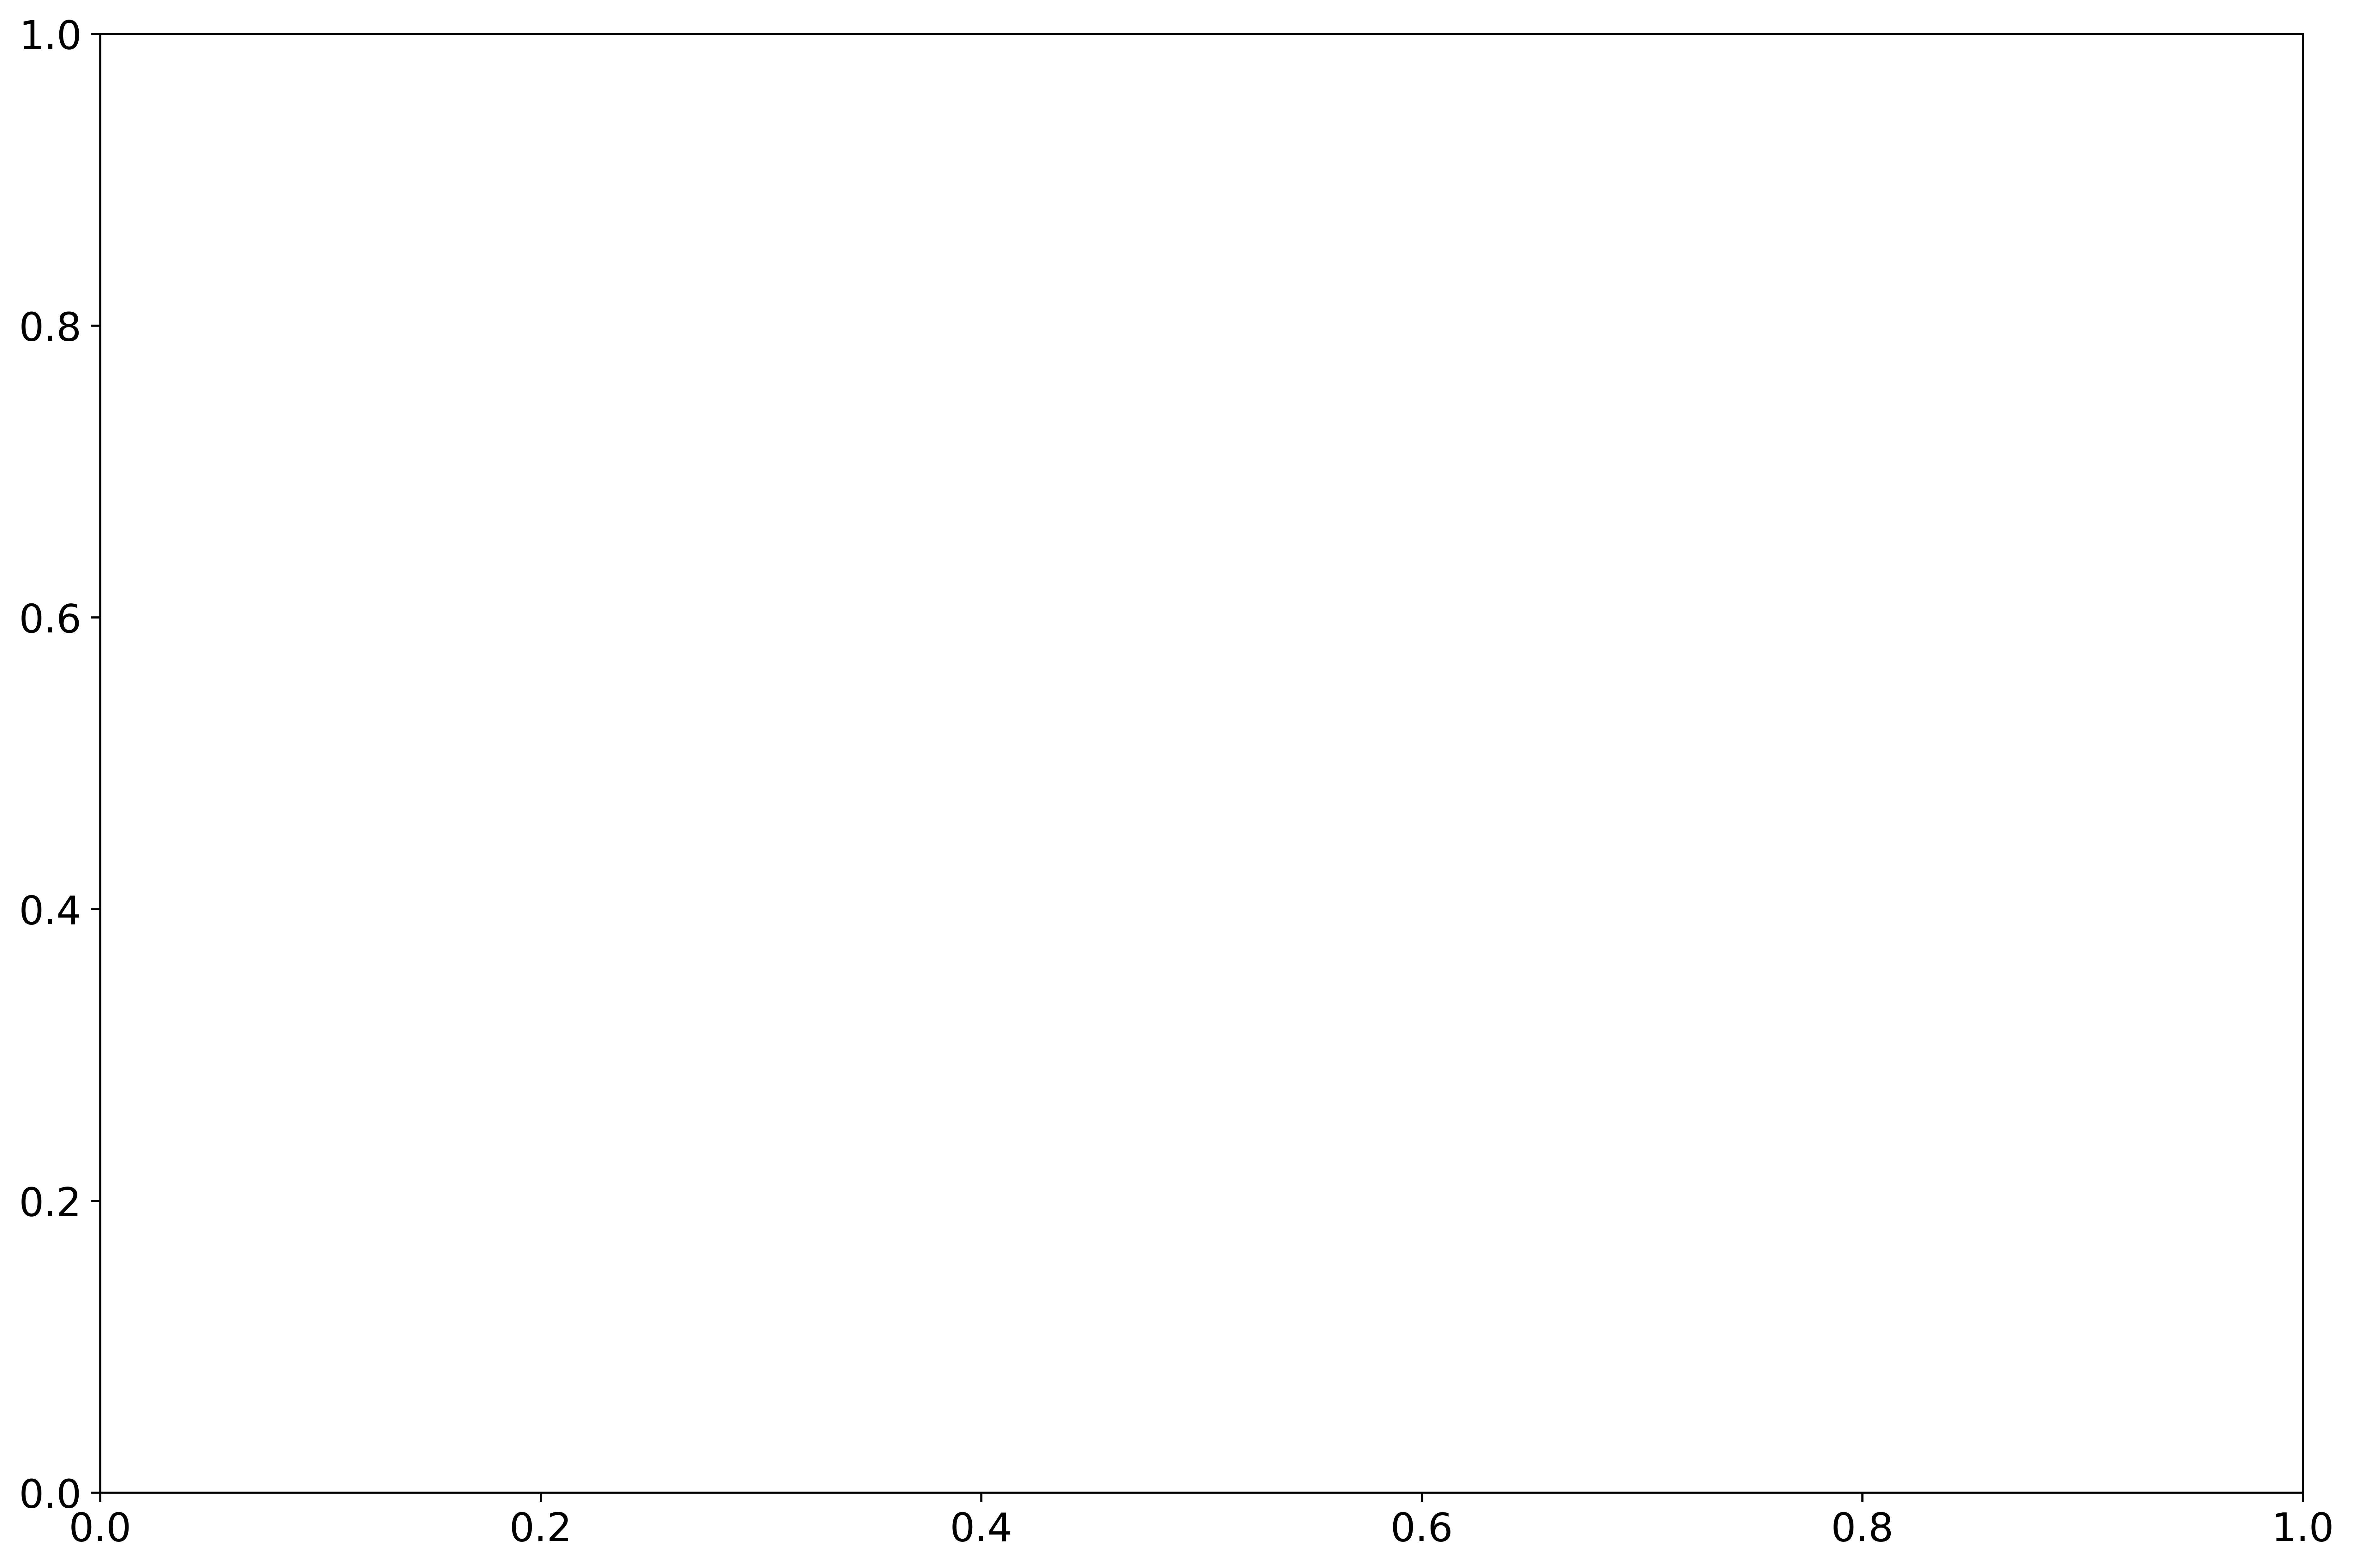

In [12]:
plt.rcParams.update({'font.size':15})

fig, ax = plt.subplots(figsize=(15,10), dpi =600)



In [21]:
np.triu([[1,2,3],[4,5,6],[7,8,9],[10,11,12]], -1)


array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 0,  8,  9],
       [ 0,  0, 12]])

In [19]:
mask = np.triu(np.ones_like(TanimotoIndex, dtype=bool))
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,
         True,  True,  True,  True],
       [False, False, False,